# 패키지

In [2]:
import matplotlib.tri as mtri
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 삼각 그리드 클래스
###  > 삼각 그리드 생성 : Triangulation
###  > 삼각 그리드 세분화 : TriRefiner, UniformTriRefiner
###  > 삼각 그리드 플롯 : triplot, tricontour, tricontourf, tripcolor
###  > 삼각 그리드 보간 : TriInterpolator, LinearTriInterpolator, CubicTriInterpolator

# 1. 삼각 그리드 생성
### Triangulation : x, y, triangles 세개의 인수를 받음 / x, y는 일련의 점들의 x좌표와 y좌표를 나태는 1차원 벡터들 / triangles : 이점들에 대한 기하학적 위상 정보. 즉, 어떤 삼각형이 있으며 각 삼각형이 어떤 점들로 이루어져있는가를 보인다. 
### triangles가 주어지지 않으면 자동 생성

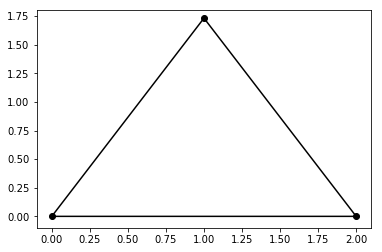

In [5]:
x = np.asarray([0, 1, 2])
y = np.asarray([0, np.sqrt(3), 0])
triangles = [[0,1,2]]
triang = mtri.Triangulation(x, y, triangles)
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.show()

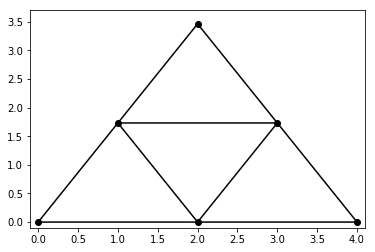

In [7]:
x = np.asarray([0, 1, 2, 3, 4, 2])
y = np.asarray([0, np.sqrt(3), 0, np.sqrt(3), 0, 2*np.sqrt(3)])
triangles = ([0, 1, 2], [2, 3, 4], [1, 2, 3], [1, 3, 5])
triang = mtri.Triangulation(x, y, triangles)
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

# 2. 그리드 세분화
### refine_triangulation : 단순히 삼각 그리드를 세분화
### refine_field : 실제 함수 값에 대해 최적화된 삼각 그리드 생성

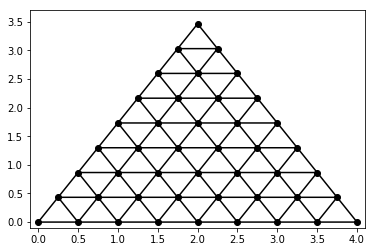

In [8]:
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=2)
plt.triplot(triang2, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.show()

# 그리드 플롯

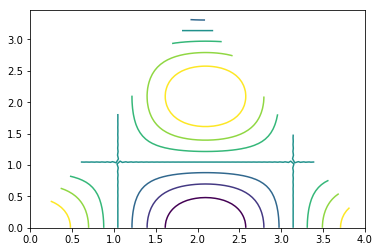

In [11]:
triang5 = refiner.refine_triangulation(subdiv=5)
z5 = np.cos(1.5*triang5.x)*np.cos(1.5*triang5.y)
plt.tricontour(triang5, z5)
plt.show()

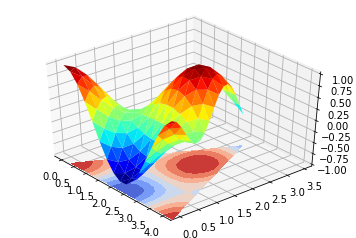

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

triang3 = refiner.refine_triangulation(subdiv=3)
z3 = np.cos(1.5 * triang3.x) * np.cos(1.5 * triang3.y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang3.x, triang3.y, z3, cmap=cm.jet, linewidth=0.2)
ax.tricontourf(triang3, z3, zdir='z', offset=-1.2, cmap=cm.coolwarm)
ax.set_zlim(-1, 1)
ax.view_init(40, -40)
plt.show()